In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [22]:
all_df = pd.read_excel('Trend.xls',sheet_name='Subs')

In [23]:
all_df.head()

,Time,VLRSubs,2GVoiceSubs,3GVoiceSubs,VoLTESubs
0,2019-01-01,6.378950e+06,2.487509e+06,1.357124e+06,472906.500000
1,2019-01-02,6.373542e+06,2.485046e+06,1.352309e+06,474875.125000
2,2019-01-03,6.373142e+06,2.481395e+06,1.350126e+06,476437.958333
3,2019-01-04,6.367197e+06,2.481166e+06,1.343412e+06,474562.125000
4,2019-01-05,6.374240e+06,2.468326e+06,1.337925e+06,482125.166667


In [32]:
all_df.dtypes

Date           datetime64[ns]
VLRSubs               float64
VoiceSubs2G           float64
VoiceSubs3G           float64
VoLTESubs             float64
dtype: object

In [24]:
all_df.columns

Index(['Time', 'VLRSubs', '2GVoiceSubs', '3GVoiceSubs', 'VoLTESubs'], dtype='object')

In [25]:
all_df.columns = ['Date', 'VLRSubs', 'VoiceSubs2G', 'VoiceSubs3G', 'VoLTESubs']

In [26]:
all_df.columns

Index(['Date', 'VLRSubs', 'VoiceSubs2G', 'VoiceSubs3G', 'VoLTESubs'], dtype='object')

In [30]:
subs_2G = all_df.filter(['Date','VoiceSubs2G'])
subs_2G.set_index('Date',inplace=True)

In [31]:
subs_2G.head(5)

,VoiceSubs2G
Date,
2019-01-01,2.487509e+06
2019-01-02,2.485046e+06
2019-01-03,2.481395e+06
2019-01-04,2.481166e+06
2019-01-05,2.468326e+06


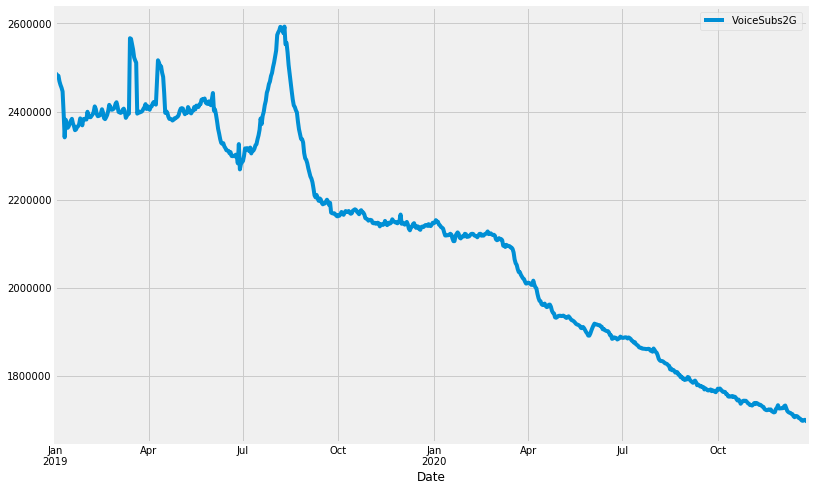

In [33]:
subs_2G.plot(figsize=(12,8))

In [34]:
from statsmodels.tsa.stattools import adfuller

In [35]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [36]:
adfuller_test(subs_2G['VoiceSubs2G'])

ADF Test Statistic : -0.22244946580298705
p-value : 0.9357922597745584
#Lags Used : 8
Number of Observations Used : 717
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [64]:
subs_2G['Seasonal First Difference']= subs_2G['VoiceSubs2G'] - subs_2G['VoiceSubs2G'].shift(180)

In [38]:
subs_2G.head(33)

,VoiceSubs2G,Seasonal First Difference
Date,,
2019-01-01,2.487509e+06,NaN
2019-01-02,2.485046e+06,NaN
2019-01-03,2.481395e+06,NaN
2019-01-04,2.481166e+06,NaN
2019-01-05,2.468326e+06,NaN
2019-01-06,2.460254e+06,NaN
2019-01-07,2.453996e+06,NaN
2019-01-08,2.445558e+06,NaN
2019-01-09,2.397261e+06,NaN


In [65]:
## Again test dickey fuller test
adfuller_test(subs_2G['Seasonal First Difference'].dropna())

ADF Test Statistic : -3.6348819194266313
p-value : 0.005128128326557744
#Lags Used : 13
Number of Observations Used : 532
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


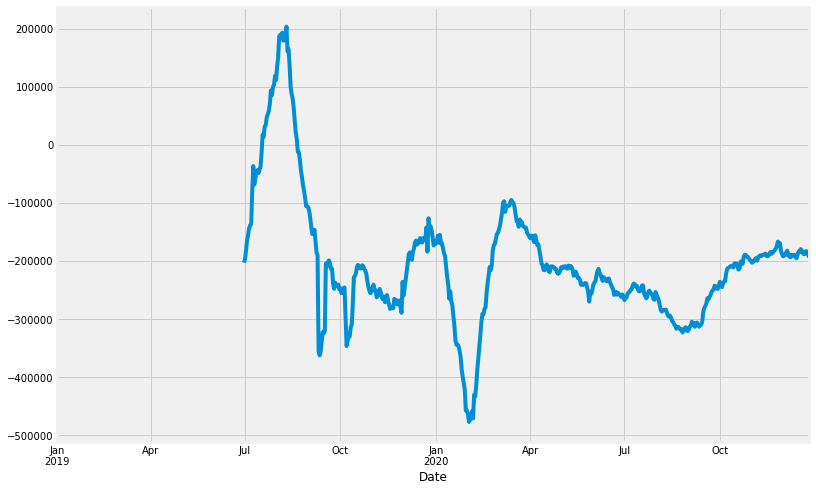

In [66]:
subs_2G['Seasonal First Difference'].plot(figsize=(12,8))

### Autocorrelation and Partial Autocorrelation

* Identification of an AR model is often best done with the PACF.
    * For an AR model, the theoretical PACF “shuts off” past the order of the model.  The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point.  Put another way, the number of non-zero partial autocorrelations gives the order of the AR model.  By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
    
    
* Identification of an MA model is often best done with the ACF rather than the PACF.
    * For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner.  A clearer pattern for an MA model is in the ACF.  The ACF will have non-zero autocorrelations only at lags involved in the model.
    
ARIMA parameters p,d,q
  
- p AR model lags (from PACF)
    
- d differencing (Number of times we have to shift)
    
- q MA lags (from ACF)

In [41]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

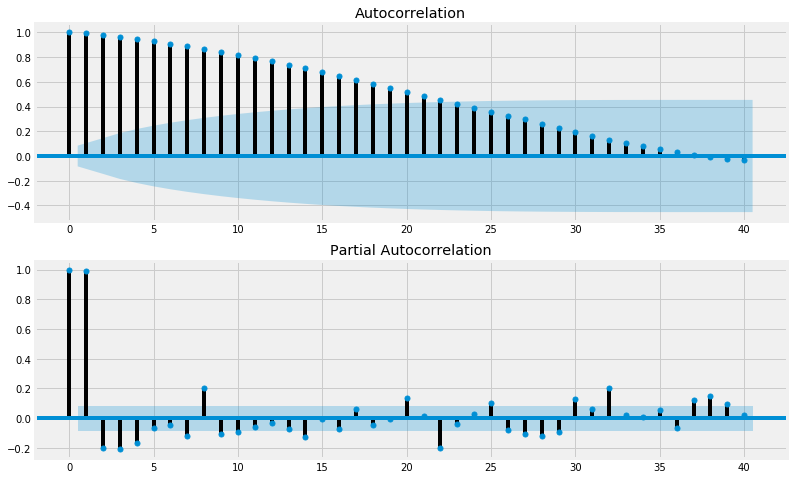

In [67]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(subs_2G['Seasonal First Difference'].iloc[181:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(subs_2G['Seasonal First Difference'].iloc[181:],lags=40,ax=ax2)

In [43]:
# For non-seasonal data
#p=1, d=1, q=17
from statsmodels.tsa.arima_model import ARIMA

In [68]:
model=ARIMA(subs_2G['VoiceSubs2G'],order=(1,1,10))
model_fit=model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [46]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.VoiceSubs2G   No. Observations:                  725
Model:                ARIMA(1, 1, 10)   Log Likelihood               -7773.585
Method:                       css-mle   S.D. of innovations          10970.940
Date:                Sat, 16 Jan 2021   AIC                          15573.171
Time:                        17:32:58   BIC                          15632.791
Sample:                    01-02-2019   HQIC                         15596.180
                         - 12-26-2020                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1092.5602    560.332     -1.950      0.052   -2190.790       5.670
ar.L1.D.VoiceSubs2G     -0.0271      0.479     -0.057      0.955      -0.966       0.912
ma.L1.D.VoiceSubs2G      0.1179      0.478      0.247      0.805      -0.819       1.054
ma.L2.D.VoiceSubs2G      0.0908      0.058      1.563      0.118      -0.023       0.205
ma.L3.D.VoiceSubs2G      0.1220      0.059      2.067      0.039       0.006       0.238
ma.L4.D.VoiceSubs2G      0.0450      0.071      0.631      0.528      -0.095       0.185
ma.L5.D.VoiceSubs2G      0.0169      0.043      0.391      0.696      -0.068       0.102
ma.L6.D.VoiceSubs2G      0.0649      0.042      1.533      0.126      -0.018       0.148
ma.L7.D.VoiceSubs2G     -0.1584      0.045     -3.524      0.000      -0.247      -0.070
ma.L8.D.VoiceSubs2G      0.0479      0.090      0.530      0.596      -0.129       0.225
ma.L9.D.VoiceSubs2G      0.0276      0.049      0.562      0.574      -0.069       0.124
ma.L10.D.VoiceSubs2G     0.0394      0.046      0.862      0.389      -0.050       0.129
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1           -36.8564           +0.0000j           36.8564            0.5000
MA.1             1.3356           -0.4721j            1.4166           -0.0541
MA.2             1.3356           +0.4721j            1.4166            0.0541
MA.3             0.6849           -1.0108j            1.2210           -0.1552
MA.4             0.6849           +1.0108j            1.2210            0.1552
MA.5            -1.0964           -0.4799j            1.1968           -0.4343
MA.6            -1.0964           +0.4799j            1.1968            0.4343
MA.7            -0.2097           -1.2462j            1.2637           -0.2765
MA.8            -0.2097           +1.2462j            1.2637            0.2765
MA.9            -1.0644           -1.6041j            1.9251           -0.3432
MA.10           -1.0644           +1.6041j            1.9251            0.3432
------------------------------------------------------------------------------
"""

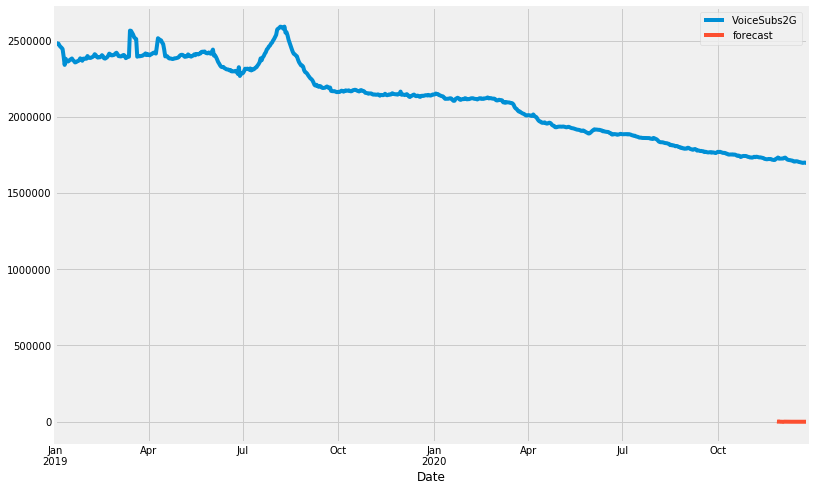

In [69]:
subs_2G['forecast']=model_fit.predict(start=696,end=725,dynamic=True)
subs_2G[['VoiceSubs2G','forecast']].plot(figsize=(12,8))

In [48]:
import statsmodels.api as sm

In [71]:
model=sm.tsa.statespace.SARIMAX(subs_2G['VoiceSubs2G'],order=(1, 1, 10),seasonal_order=(1,1,1,180))
results=model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:993: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


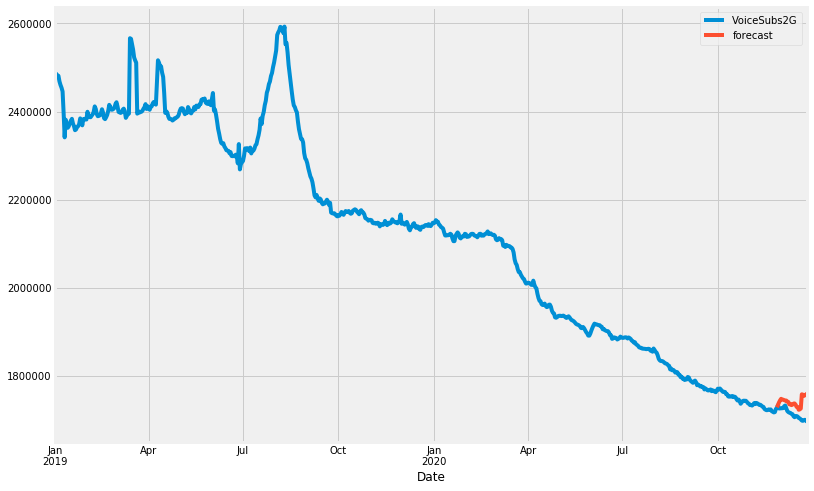

In [72]:
subs_2G['forecast']=results.predict(start=696,end=725,dynamic=True)
subs_2G[['VoiceSubs2G','forecast']].plot(figsize=(12,8))

In [73]:
from pandas.tseries.offsets import DateOffset
future_dates=[subs_2G.index[-1]+ DateOffset(days=x)for x in range(0,360)]

In [74]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=subs_2G.columns)

In [75]:
future_datest_df.tail()

,VoiceSubs2G,Seasonal First Difference,forecast
2021-12-16,NaN,NaN,NaN
2021-12-17,NaN,NaN,NaN
2021-12-18,NaN,NaN,NaN
2021-12-19,NaN,NaN,NaN
2021-12-20,NaN,NaN,NaN


In [76]:
future_df=pd.concat([subs_2G,future_datest_df])

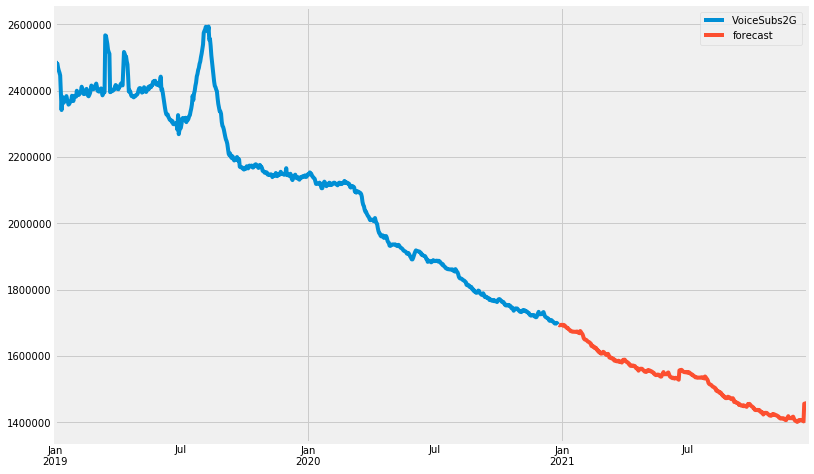

In [77]:
future_df['forecast'] = results.predict(start = 726, end = 1084, dynamic= True)  
future_df[['VoiceSubs2G', 'forecast']].plot(figsize=(12, 8)) 

In [59]:
future_df.to_excel('out.xls')